<a href="https://colab.research.google.com/github/Cristian28288/SyS/blob/main/TransformadaZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Descargue 10 segundos de la canción de su preferencia desde youtube, y generé un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario también debe poder fijar los parámetros de diseño de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para diseño Butterworth, Chebyshev 1, Chebyshev 2, Bessel y Elíptico.**

In [1]:
#! pip install youtube-dl
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     \ 2.7 MB 2.7 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.7.4-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.7.4-py3-none-any.whl (162 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.6 MB/s eta 0:00:00
Using cached charset_

In [2]:
link="https://youtu.be/JmEiqfuYTJY"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://youtu.be/JmEiqfuYTJY
[youtube] JmEiqfuYTJY: Downloading webpage
[youtube] JmEiqfuYTJY: Downloading ios player API JSON
[youtube] JmEiqfuYTJY: Downloading web creator player API JSON
[youtube] JmEiqfuYTJY: Downloading player 53afa3ce
[youtube] JmEiqfuYTJY: Downloading m3u8 information
[info] JmEiqfuYTJY: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    5.32MiB in 00:00:00 at 28.87MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)


In [3]:
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [4]:
!pip install soundfile

In [5]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [6]:
x.shape[0]/fs

319.4137083333333

In [9]:
xpro = x.copy() #copiar archivos para procesar
ti = 50
tf = 60
xs = xpro[int(ti*fs):int((tf*fs)),:]

In [10]:
#Para escuchar el trozo de audio con el que se va a trabajar:
#No usar un trozo muy grande o el entorno se puede desconectar
from IPython.display import Audio
Audio([xs[:,1], xs[:,0]],rate=fs)

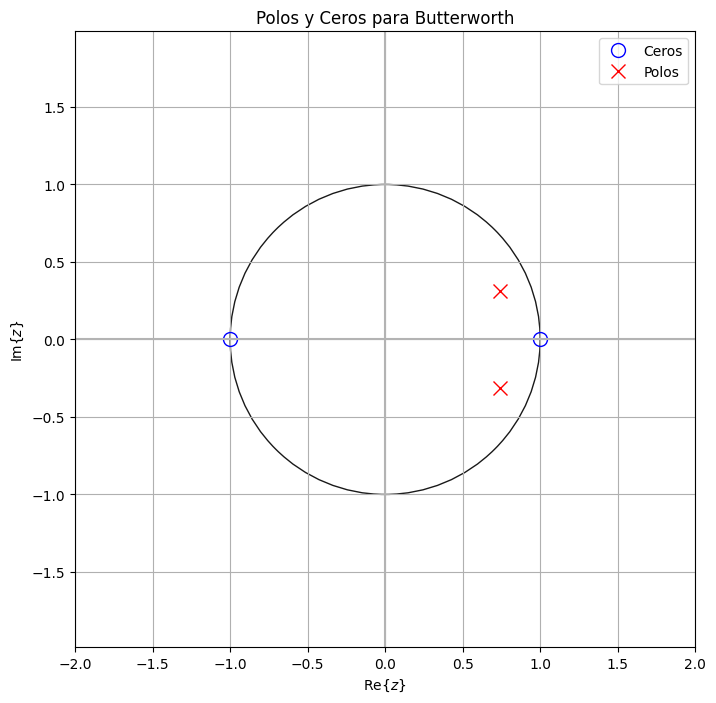

<ipython-input-15-49ccfa5a99a2>:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)), 'b')


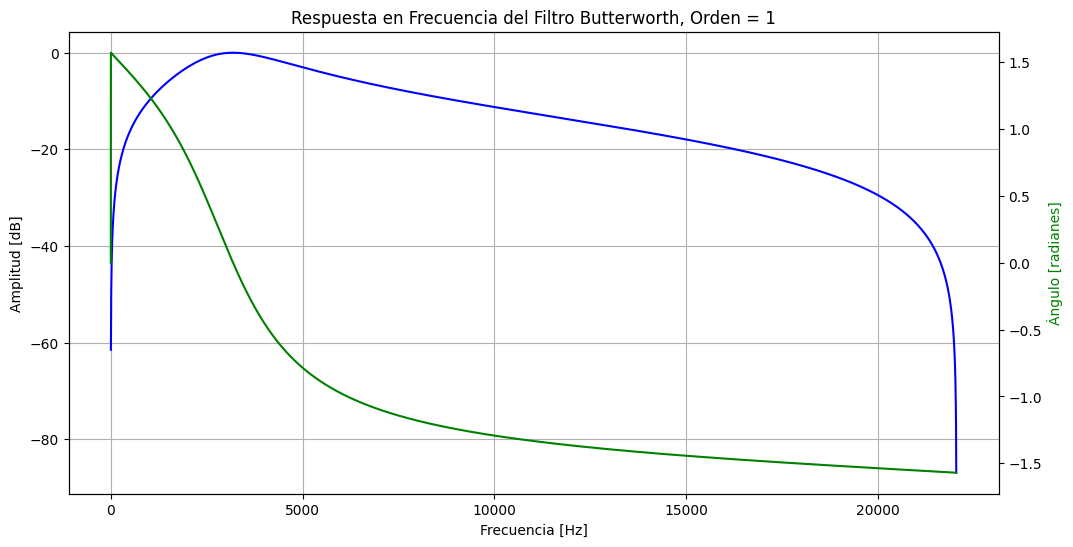

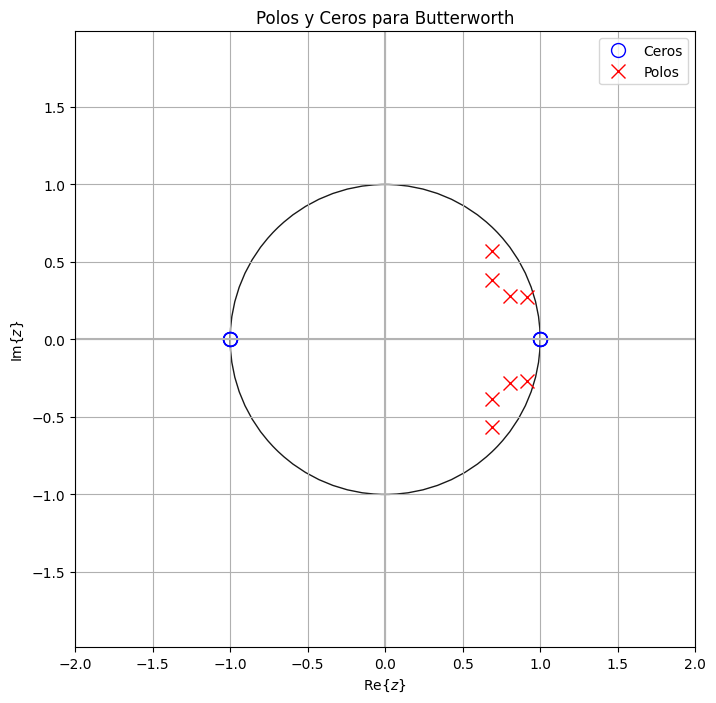

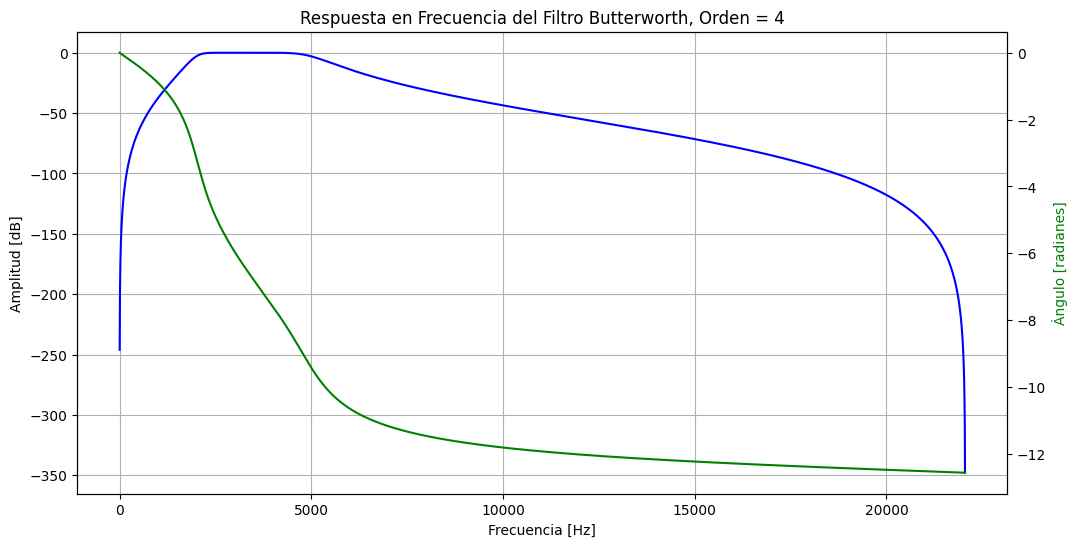

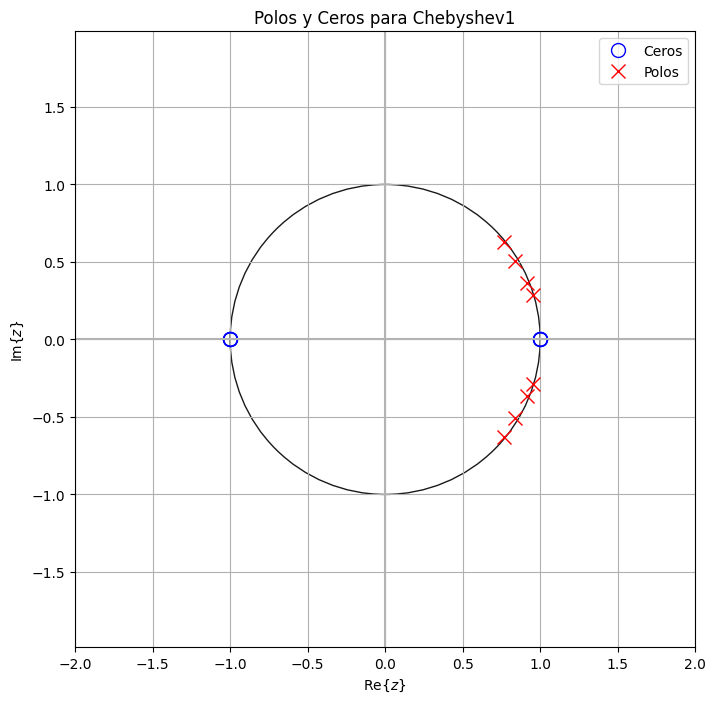

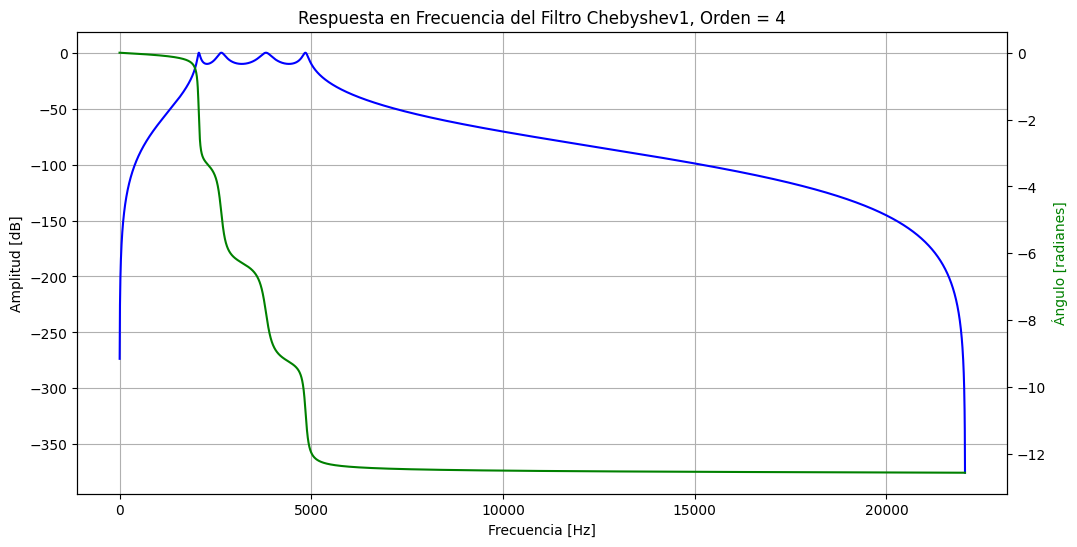

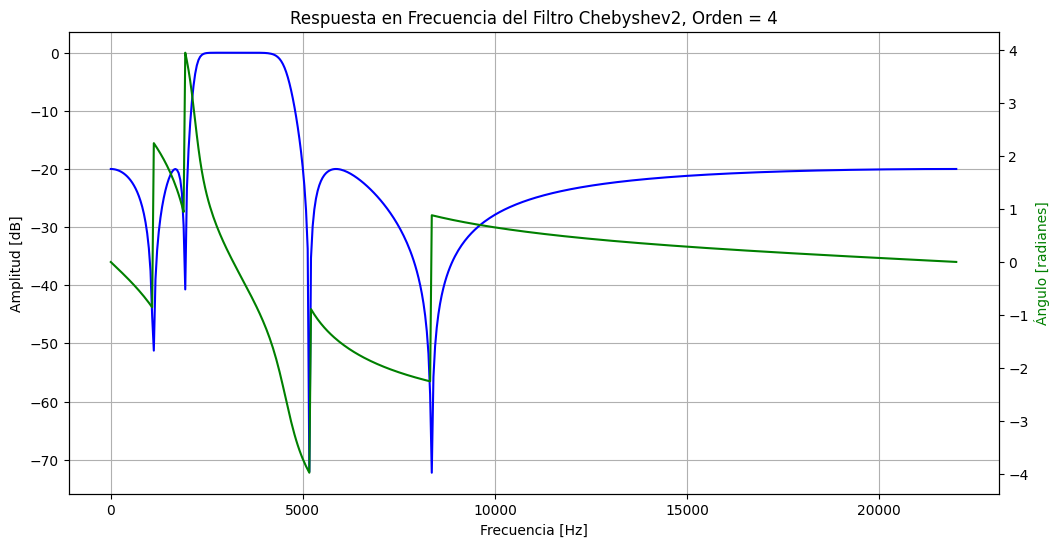

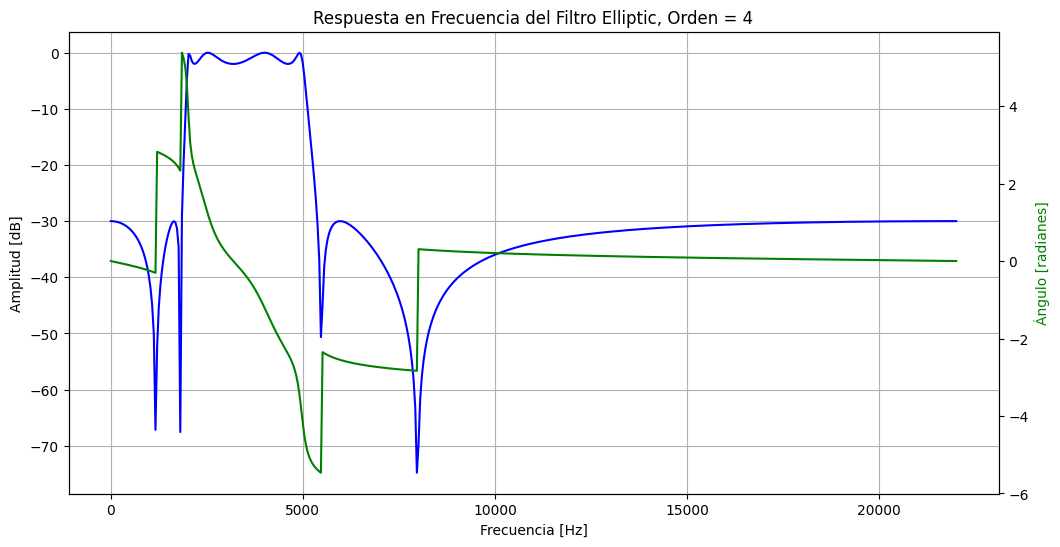

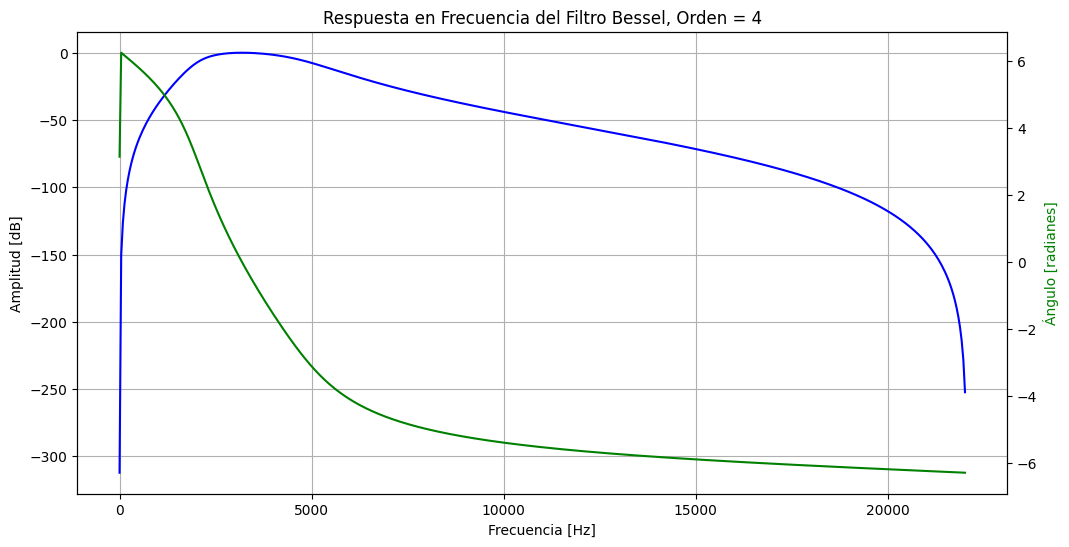

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.signal import butter as bw, cheby1, cheby2, ellip, bessel, freqz, zpk2sos, sosfreqz, sosfilt, tf2zpk

# Función para calcular la respuesta en frecuencia desde ceros, polos y ganancia
def freqz_zpk(zeros, poles, gain, fs=1):
    sos = zpk2sos(zeros, poles, gain)  # Convertir a formato SOS
    w, h = sosfreqz(sos, worN=8000, fs=fs)
    return w, h

# Función para graficar la respuesta en frecuencia
def plot_freq_response(filter_name, w, h, N):
    plt.figure(figsize=(12, 6))
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title(f'Respuesta en Frecuencia del Filtro {filter_name}, Orden = {N}')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud [dB]')
    plt.grid(True)
    plt.twinx()
    angles = np.unwrap(np.angle(h))
    plt.plot(w, angles, 'g')
    plt.ylabel('Ángulo [radianes]', color='g')
    plt.axis('tight')
    plt.show()

# Función para mostrar los polos y ceros
def show_zp(zeros, poles, title='Z-plane'):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.plot(np.real(zeros), np.imag(zeros), 'bo', fillstyle='none', ms=10, label='Ceros')
    ax.plot(np.real(poles), np.imag(poles), 'rx', fillstyle='none', ms=10, label='Polos')
    unit_circle = Circle((0, 0), radius=1, fill=False, color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    plt.title(title)
    plt.xlabel('Re{$z$}')
    plt.ylabel('Im{$z$}')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()
    plt.legend()
    plt.show()

# Frecuencia de muestreo y parámetros del filtro
fs = 44100
Wn = [2000, 5000]  # Banda pasante
filt = 'bandpass'  # Tipo de filtro
out = 'zpk'  # Tipo de salida: 'zpk' para ceros, polos y ganancia

# Filtros y sus parámetros
filters = [
    ('Butterworth', bw, {'N': 1, 'Wn': Wn, 'btype': filt, 'output': out, 'fs': fs}),
    ('Butterworth', bw, {'N': 4, 'Wn': Wn, 'btype': filt, 'output': out, 'fs': fs}),
    ('Chebyshev1', cheby1, {'N': 4, 'rp': 10, 'Wn': Wn, 'btype': filt, 'output': out, 'fs': fs}),
    ('Chebyshev2', cheby2, {'N': 4, 'rs': 20, 'Wn': Wn, 'btype': filt, 'output': 'ba', 'fs': fs}),
    ('Elliptic', ellip, {'N': 4, 'rp': 2, 'rs': 30, 'Wn': Wn, 'btype': filt, 'output': 'ba', 'fs': fs}),
    ('Bessel', bessel, {'N': 4, 'Wn': Wn, 'btype': filt, 'output': 'ba', 'fs': fs})
]

for filter_name, filter_func, params in filters:
    if filter_name in ['Chebyshev2', 'Elliptic', 'Bessel']:
        num, den = filter_func(**params)
        w, h = freqz(num, den, fs=fs)
        plot_freq_response(filter_name, w, h, params['N'])
    else:
        zeros, poles, gain = filter_func(**params)
        w, h = freqz_zpk(zeros, poles, gain, fs=fs)
        show_zp(zeros, poles, title=f'Polos y Ceros para {filter_name}')
        plot_freq_response(filter_name, w, h, params['N'])

La comparación muestra que los resultados obtenidos con los filtros IIR están en línea con los descritos en el cuaderno tipo IIR . Las características específicas de cada filtro se reflejan claramente en sus gráficos de respuesta en frecuencia y en la representación de polos y ceros, confirmando que el diseño y la implementación del filtro se han realizado correctamente.

**2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) y [material de apoyo](https://www.programcreek.com/python/example/100540/scipy.signal.firwin)). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR. Nota: Recuerde que un filtro FIR utiliza solamente raíces tipo ceros, es decir que $a_0=1$, y $a_k=0$ $\forall k\in\{1,2,\dots\}$.**


Método de diseño de filtros FIR por ventaneo: Es una técnica común para crear filtros digitales. Primero, se especifican las características deseadas del filtro, como la frecuencia de corte y el tipo de filtro (pasa bajo, pasa alto, etc.). Luego, se calcula la respuesta al impulso ideal del filtro, que es una función matemática basada en la transformada inversa de Fourier del perfil de frecuencia deseado. Dado que esta respuesta ideal puede ser infinita en duración, se utiliza una función ventana para hacerla finita. La ventana es una función que reduce gradualmente el valor de la respuesta ideal a cero en los extremos, minimizando el "efecto de Gibbs" y reduciendo el overshoot en la respuesta de frecuencia. Ventanas comunes incluyen la ventana de Hamming, Hanning y Blackman. Los coeficientes del filtro FIR se obtienen multiplicando la respuesta ideal por la ventana, resultando en la respuesta al impulso del filtro final. Este enfoque simplifica el diseño y asegura estabilidad, pero los filtros FIR pueden requerir más coeficientes que los filtros IIR para lograr una respuesta similar. La elección de la ventana afecta la precisión de la aproximación del filtro ideal y la complejidad del filtro.








| Característica            | Filtros IIR                            | Filtros FIR                            |
|---------------------------|----------------------------------------|----------------------------------------|
| **Estructura**            | Utilizan tanto ceros como polos.       | Utilizan solo ceros.                   |
| **Estabilidad**           | Puede ser inestable si los polos están en el exterior del círculo unitario. | Siempre estables ya que no tienen polos. |
| **Respuesta de Fase**     | Generalmente no lineal.                | Puede ser lineal si se usa una ventana adecuada. |
| **Complejidad Computacional** | Menos coeficientes, por lo que son más eficientes en términos de memoria y procesamiento. | Generalmente requieren más coeficientes para lograr una respuesta similar. |
| **Respuesta en Frecuencia** | Puede aproximar respuestas más complejas con menos coeficientes. | Ofrecen una mejor aproximación a la respuesta en frecuencia, pero a menudo con más coeficientes. |
| **Tiempo de Respuesta**   | Puede tener un tiempo de respuesta más corto. | Tiempo de respuesta puede ser más largo debido a la longitud de la respuesta al impulso. |
| **Diseño y Implementación** | Más complicado debido a la necesidad de considerar la estabilidad y el diseño de los polos y ceros. | Más simple, ya que se basa en la aplicación de una ventana a una respuesta ideal. |
| **Aplicaciones Típicas**  | Usados en aplicaciones donde la eficiencia y el tiempo de respuesta son críticos. | Preferidos cuando se requiere una respuesta precisa y estable, como en procesamiento de señales. |


| **Tipo de Filtro** | **Ventajas**                                                | **Desventajas**                                                |
|--------------------|-------------------------------------------------------------|---------------------------------------------------------------|
| **Filtros FIR**    | - Estabilidad garantizada.                                | - Mayor complejidad computacional y uso de memoria en comparación con los filtros IIR para una respuesta similar. |
|                    | - Respuesta en fase lineal (si se utiliza un diseño adecuado). | - Tiempo de respuesta más largo debido al mayor número de coeficientes necesarios. |
|                    | - Simplicidad en el diseño y la implementación.             |                                                               |
| **Filtros IIR**    | - Menor complejidad computacional y uso de memoria.         | - Posibilidad de inestabilidad si no se diseñan cuidadosamente. |
|                    | - Tiempo de respuesta más corto, adecuado para aplicaciones en tiempo real. | - Respuesta de fase no lineal, lo que puede ser un problema en aplicaciones que requieren una fase lineal. |


**3. Incluya la implementación del filtro `firwin` en el punto 1.**

In [ ]:
#! pip install youtube-dl
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

In [ ]:
link="https://youtu.be/JmEiqfuYTJY"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

In [ ]:
!ffmpeg -i audio.mp3 output.wav

In [ ]:
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)

# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

In [ ]:
x.shape[0]/fs

In [ ]:
xpro = x.copy() #copiar archivos para procesar
ti = 50
tf = 60
xs = xpro[int(ti*fs):int((tf*fs)),:]

In [ ]:
#Para escuchar el trozo de audio con el que se va a trabajar:
#No usar un trozo muy grande o el entorno se puede desconectar
from IPython.display import Audio
Audio([xs[:,1], xs[:,0]],rate=fs)

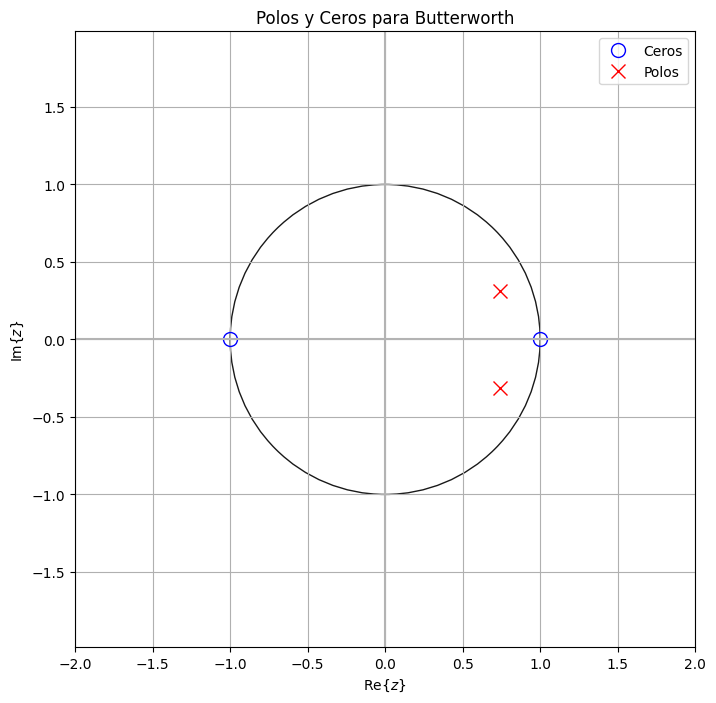

<ipython-input-16-558c2033f44b>:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(np.abs(h)), 'b')


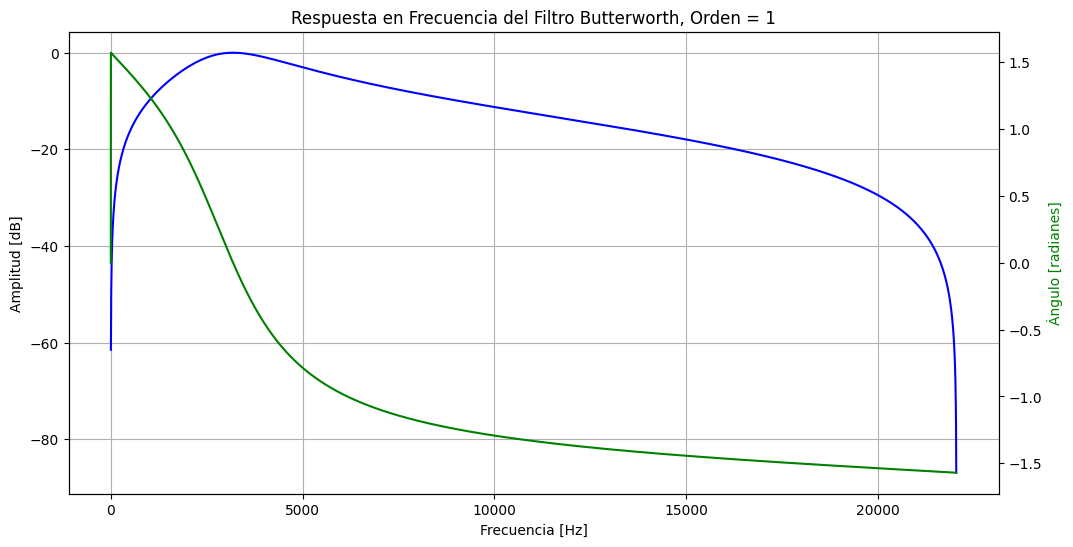

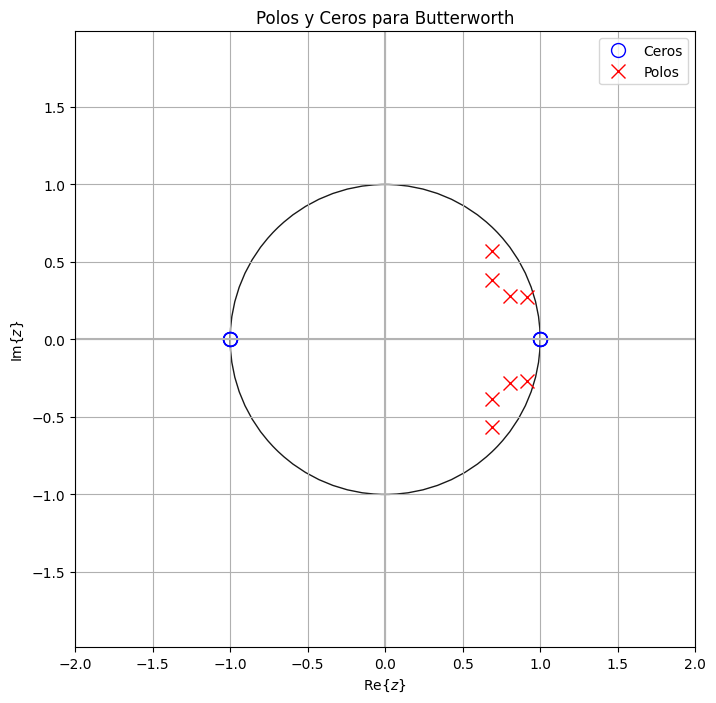

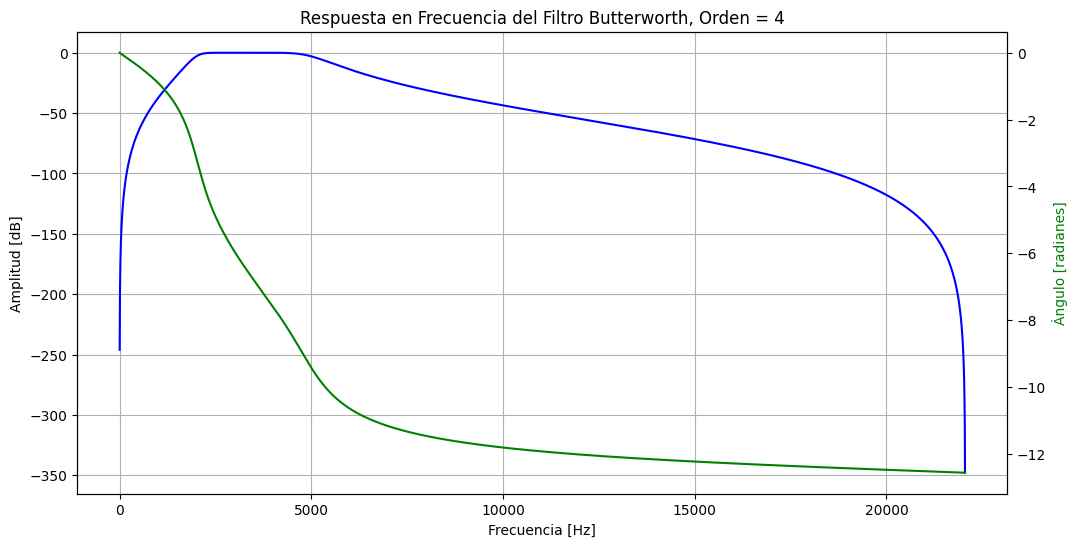

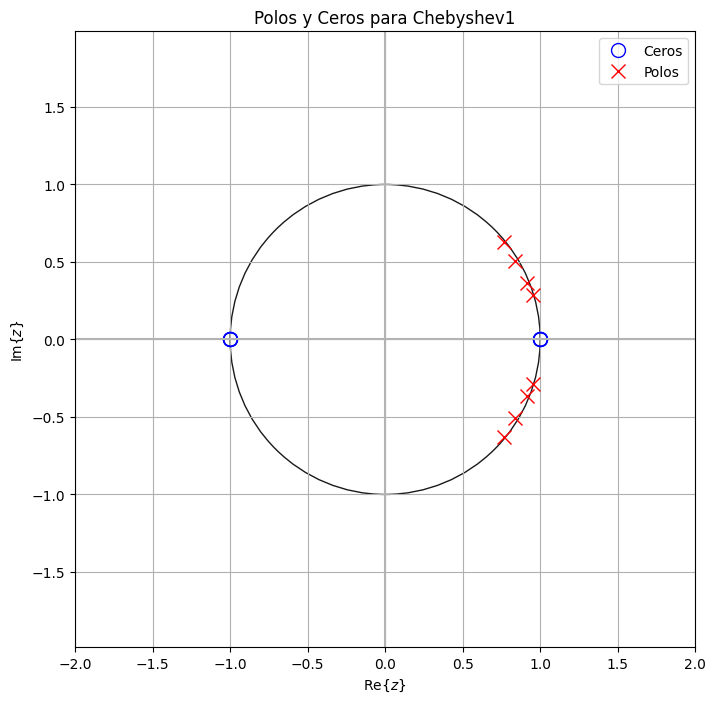

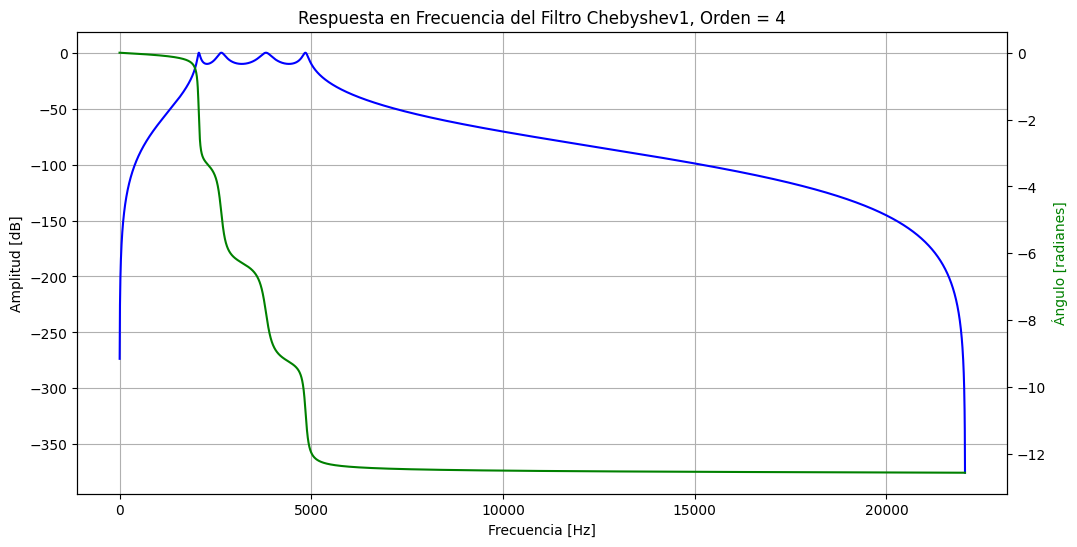

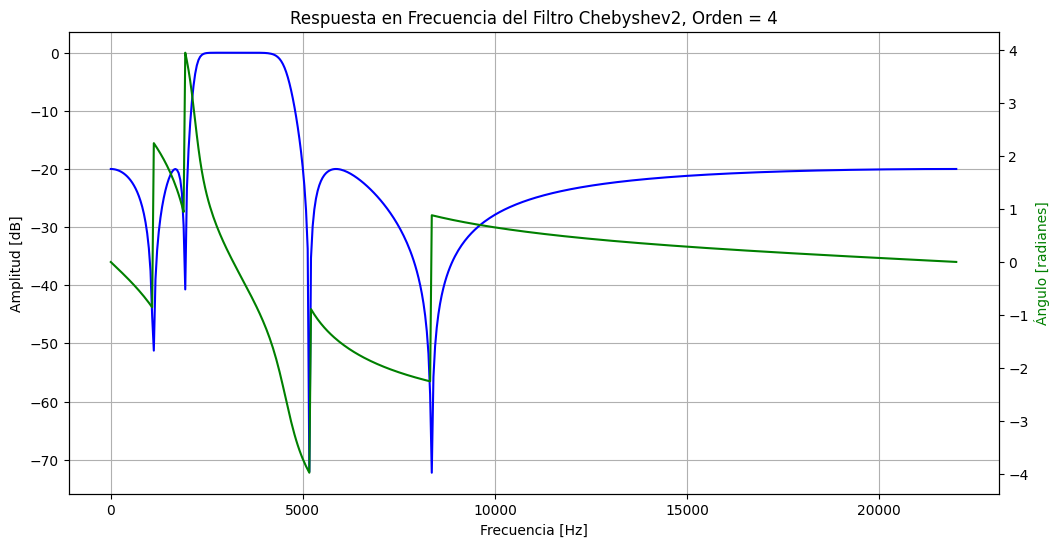

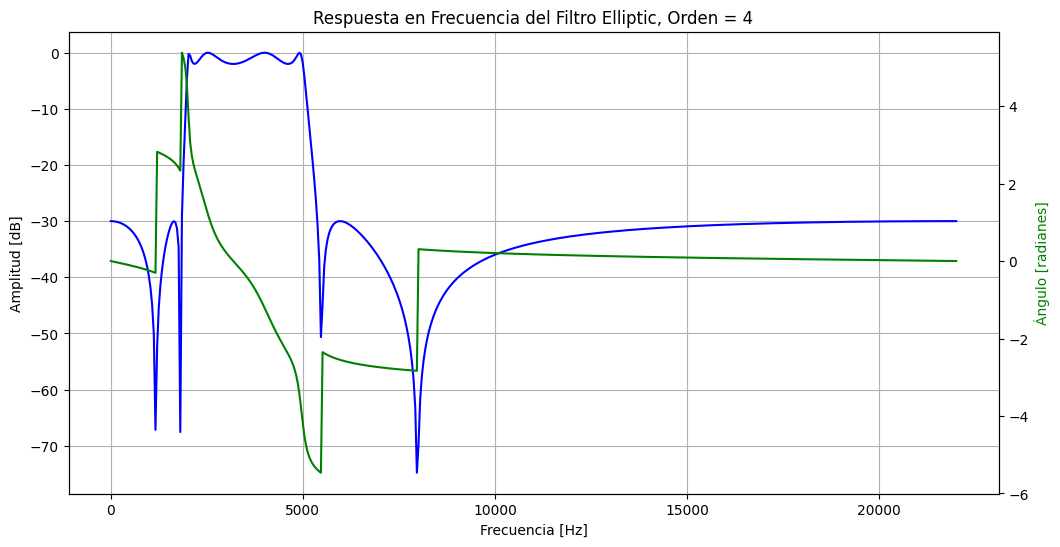

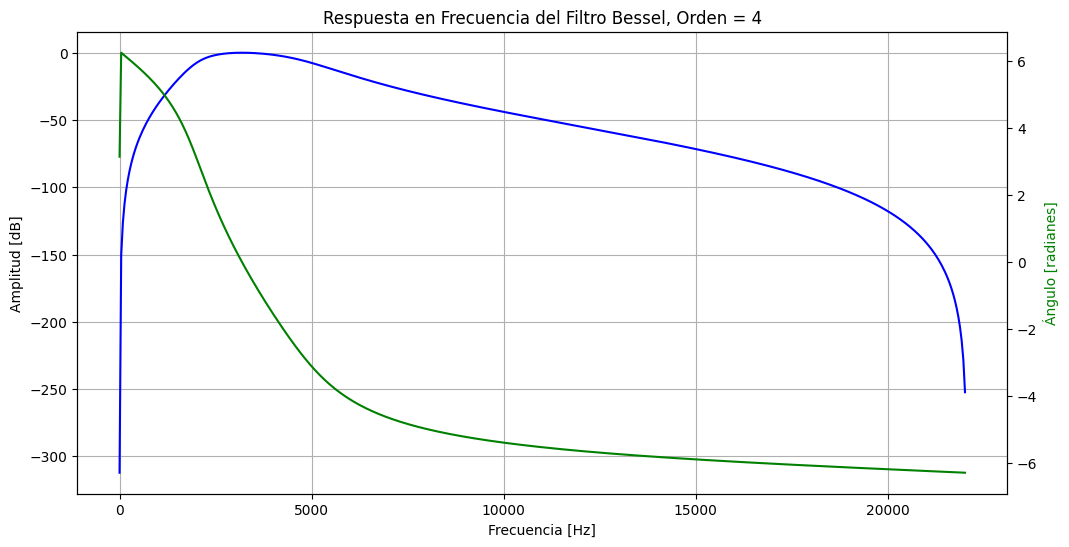

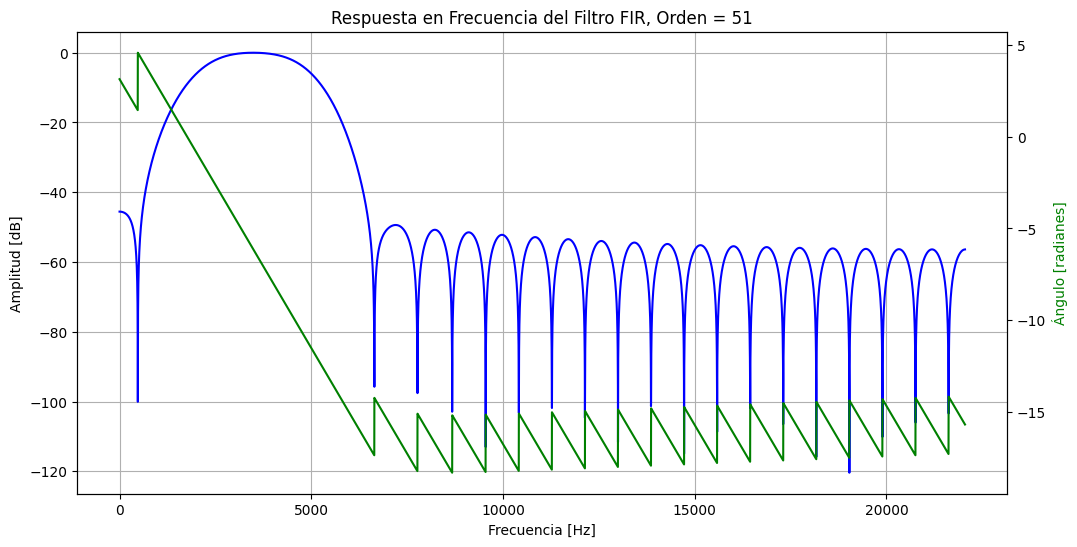

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.signal import butter as bw, cheby1, cheby2, ellip, bessel, firwin, freqz, zpk2sos, sosfreqz, sosfilt, tf2zpk

# Función para calcular la respuesta en frecuencia desde ceros, polos y ganancia
def freqz_zpk(zeros, poles, gain, fs=1):
    sos = zpk2sos(zeros, poles, gain)  # Convertir a formato SOS
    w, h = sosfreqz(sos, worN=8000, fs=fs)
    return w, h

# Función para graficar la respuesta en frecuencia
def plot_freq_response(filter_name, w, h, N):
    plt.figure(figsize=(12, 6))
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title(f'Respuesta en Frecuencia del Filtro {filter_name}, Orden = {N}')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud [dB]')
    plt.grid(True)
    plt.twinx()
    angles = np.unwrap(np.angle(h))
    plt.plot(w, angles, 'g')
    plt.ylabel('Ángulo [radianes]', color='g')
    plt.axis('tight')
    plt.show()

# Función para mostrar los polos y ceros
def show_zp(zeros, poles, title='Z-plane'):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.plot(np.real(zeros), np.imag(zeros), 'bo', fillstyle='none', ms=10, label='Ceros')
    ax.plot(np.real(poles), np.imag(poles), 'rx', fillstyle='none', ms=10, label='Polos')
    unit_circle = Circle((0, 0), radius=1, fill=False, color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    plt.title(title)
    plt.xlabel('Re{$z$}')
    plt.ylabel('Im{$z$}')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()
    plt.legend()
    plt.show()

# Frecuencia de muestreo y parámetros del filtro
fs = 44100
Wn = [2000, 5000]  # Banda pasante
filt = 'bandpass'  # Tipo de filtro
out = 'zpk'  # Tipo de salida: 'zpk' para ceros, polos y ganancia

# Filtros y sus parámetros
filters = [
    ('Butterworth', bw, {'N': 1, 'Wn': Wn, 'btype': filt, 'output': out, 'fs': fs}),
    ('Butterworth', bw, {'N': 4, 'Wn': Wn, 'btype': filt, 'output': out, 'fs': fs}),
    ('Chebyshev1', cheby1, {'N': 4, 'rp': 10, 'Wn': Wn, 'btype': filt, 'output': out, 'fs': fs}),
    ('Chebyshev2', cheby2, {'N': 4, 'rs': 20, 'Wn': Wn, 'btype': filt, 'output': 'ba', 'fs': fs}),
    ('Elliptic', ellip, {'N': 4, 'rp': 2, 'rs': 30, 'Wn': Wn, 'btype': filt, 'output': 'ba', 'fs': fs}),
    ('Bessel', bessel, {'N': 4, 'Wn': Wn, 'btype': filt, 'output': 'ba', 'fs': fs}),
    ('FIR', firwin, {'numtaps': 51, 'cutoff': Wn, 'window': 'hamming', 'pass_zero': False, 'fs': fs})  # FIR Filter
]

for filter_name, filter_func, params in filters:
    if filter_name == 'FIR':
        num = filter_func(**params)
        w, h = freqz(num, worN=8000, fs=fs)
        plot_freq_response(filter_name, w, h, params['numtaps'])
    elif filter_name in ['Chebyshev2', 'Elliptic', 'Bessel']:
        num, den = filter_func(**params)
        w, h = freqz(num, den, fs=fs)
        plot_freq_response(filter_name, w, h, params['N'])
    else:
        zeros, poles, gain = filter_func(**params)
        w, h = freqz_zpk(zeros, poles, gain, fs=fs)
        show_zp(zeros, poles, title=f'Polos y Ceros para {filter_name}')
        plot_freq_response(filter_name, w, h, params['N'])
